<a href=""><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Iris Dataset</font></h1>

## Introduction
We have been provided with Iris-Species dataset which includes attributes about the Flower(Species) such as Sepal/Petal length and Width.<br>
User need to Implement a Machine Learning Model to predict the species from the Sepal and Petal attributes.

In [1]:
# Import all required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

Let's Import the File from URL and view the Realation among them.

In [12]:
columns=["sepal_length" ,"sepal_width" ,"petal_length" ,"petal_width" ,"target"]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, names=columns )
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Check Rows and Columns
print('No. of Rows : {} and columns(Features) : {} in the DataSet'.format(df.shape[0], df.shape[1]))

No. of Rows : 150 and columns(Features) : 5 in the DataSet


In [14]:
# Check for null values
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
print(f"No. of Null values in Target : {len(df[df['target'].isnull() == True])}")

No. of Null values in Target : 0


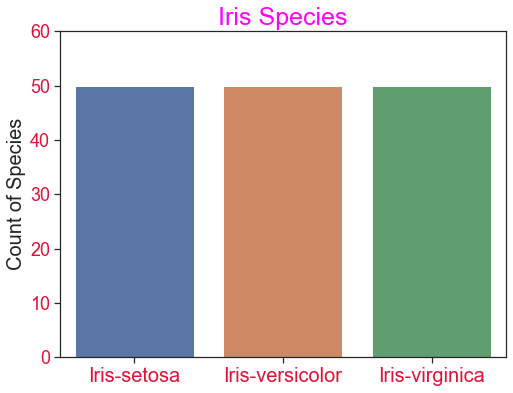

In [107]:
# Check the Species Distribution
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='target', ax=ax )
ax.set_title(label="Iris Species", color='magenta', fontsize=25)
ax.set_ylabel("Count of Species", fontsize=20)
ax.set_xlabel("")

plt.yticks(ax.get_yticks(), color='crimson', size=18)
plt.xticks(ax.get_xticks(), color='crimson', size=20)
plt.show()

### <li>We can observe there are no missing values in the DataSet<li>The Species are distributed evenly in the Data set

In [ ]:
name = "petal_width"
str.replace(name,'_',' ').capitalize()

## Data Visualization

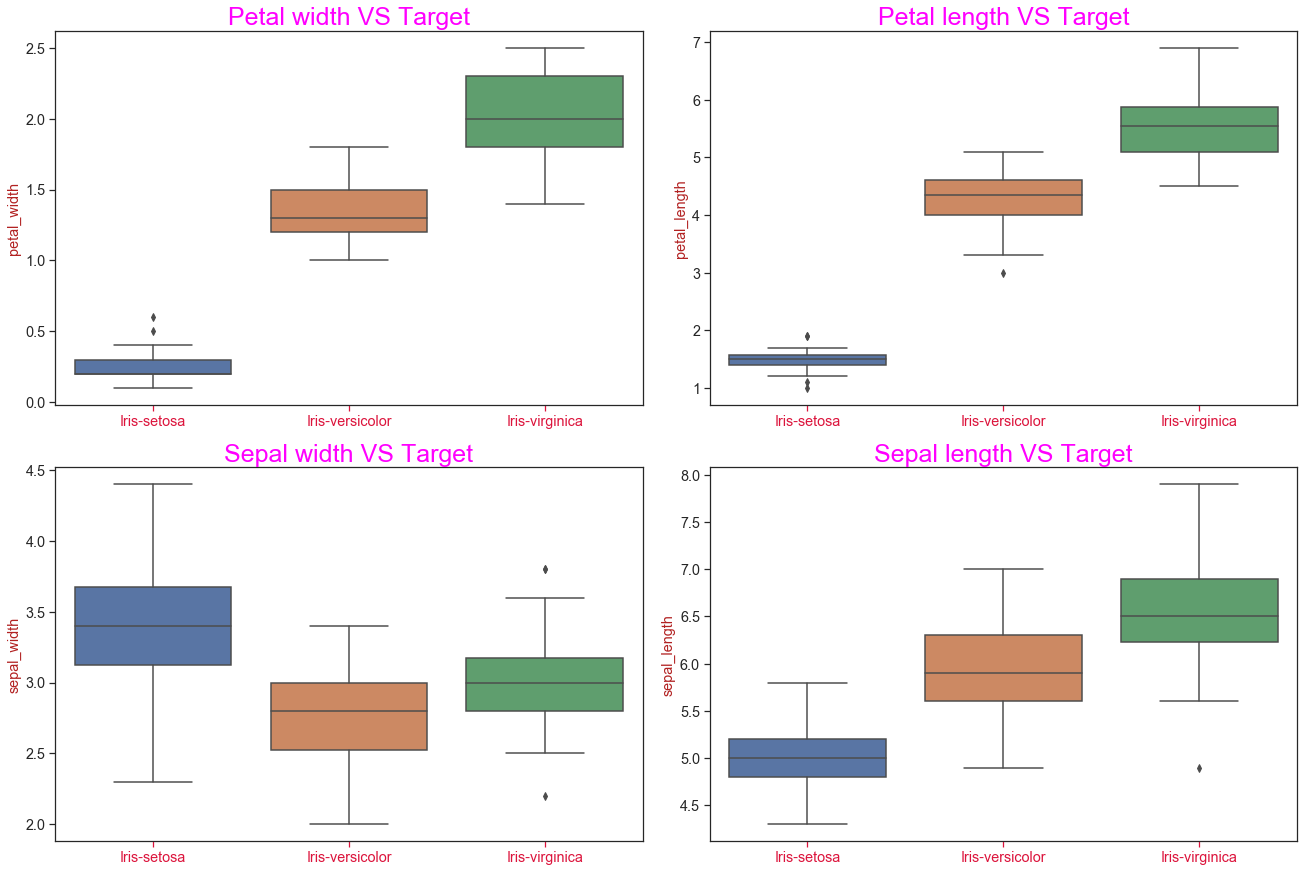

In [134]:
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(18,12))

params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (18, 12),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'25',
         'axes.labelcolor':'firebrick',
         'text.color':'magenta',
         'xtick.color':'crimson',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

for i in range(len(axes)):
    y_tag = 'petal' if i==0 else 'sepal'
    
    ax = axes[i][0]
    y_column = y_tag + '_width'
    title = str.replace(y_column, '_', ' ').capitalize() + ' VS Target'
    _= sns.boxplot(data=df, ax=ax, x='target', y=y_column)
    _= ax.set(ylabel=y_column, xlabel="", title=title )
    
    ax = axes[i][1]
    y_column = y_tag + '_length'
    title = str.replace(y_column, '_', ' ').capitalize() + ' VS Target'
    _= sns.boxplot(data=df, ax=ax, x='target', y=y_column)
    _= ax.set(ylabel=y_column, xlabel="", title=title )
    
plt.rcParams.clear()

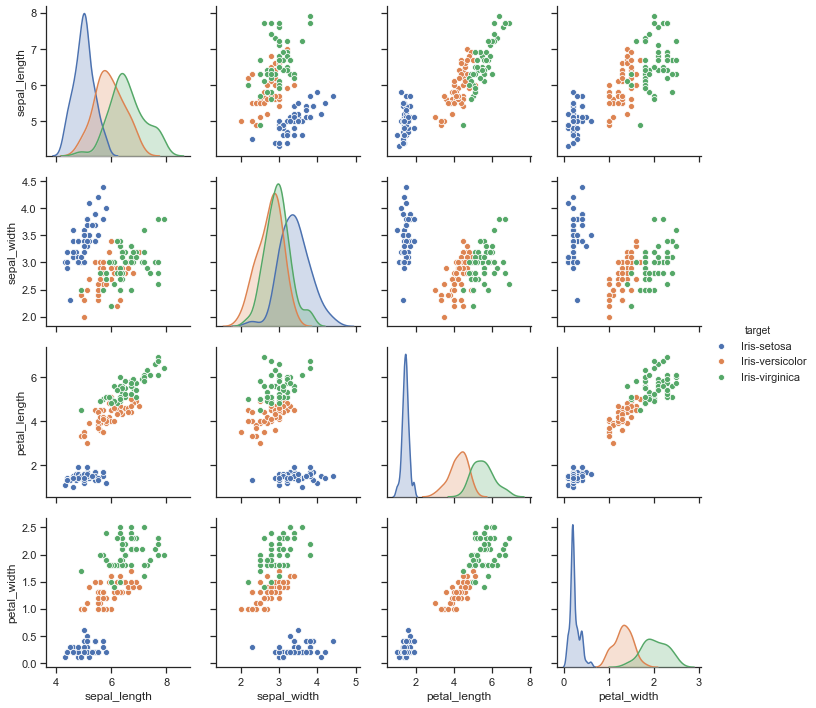

In [56]:
# Draw a pairplot to understand the relation with different attributes
_ = sns.pairplot(df, hue='target')

### Observations
<li>We can easily distinguish Setosa with others from Petal Length and Petal Width
<li>Versicolor and Virginica are closey related with each other and overlaps on many attributes.

## Feature Selection, Normalization and Spliting

In [278]:
features = columns[:-1]
X = df[features]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [279]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.target)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Normalize data

In [280]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Train Test Split  
Let's split the data in to Training and Testing set

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## Regression Model

In [282]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\amaindola\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [283]:
y_hat = LR.predict(X_test)
y_test, y_hat

(array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]),
 array([2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

#### Function to plot Confusion Matrix

In [284]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.metrics import confusion_matrix
    
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=classes, index = classes)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (12,8))
    plt.title(title, color='green', fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color='indigo')
    plt.yticks(tick_marks, classes, color='indigo')
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size 
    plt.tight_layout()
    plt.ylabel('Actual', color='crimson', fontsize=20)
    plt.xlabel('Predicted', color='crimson', fontsize=20)

Accuraccy of Test set : 0.90
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.40      0.57         5
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.80      0.81        30
weighted avg       0.93      0.90      0.89        30



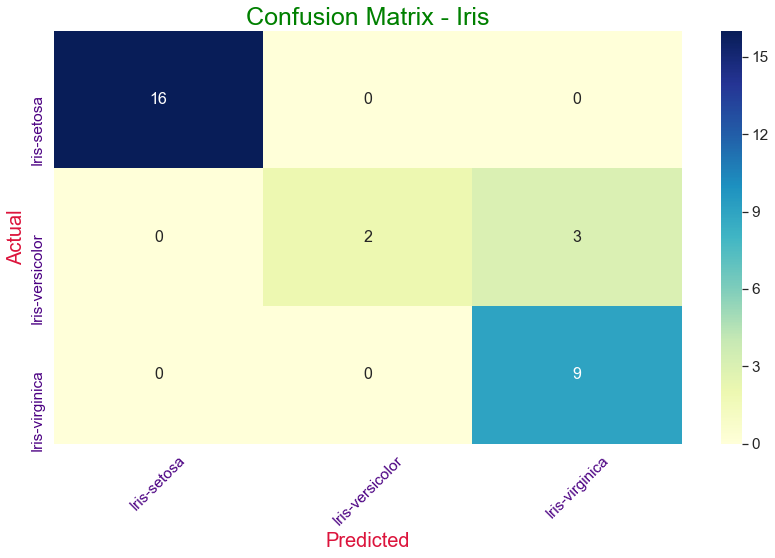

In [285]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# Compute confusion matrix
print("Accuraccy of Test set : {0:0.2f}".format(np.mean(y_hat == y_test)))
print (classification_report(y_test, y_hat))
plot_confusion_matrix(y_test, y_hat, le.classes_, title="Confusion Matrix - Iris")

In [263]:
df_new = pd.DataFrame(X_test)
df_new.head()

,0,1,2,3
0,0.674501,-0.587764,1.047087,1.185010
1,-0.173674,1.726266,-1.170675,-1.181504
2,1.886180,-0.587764,1.331416,0.922064
3,2.128516,-0.124958,1.615744,1.185010
4,1.765012,-0.356361,1.445147,0.790591


In [225]:
# df_new['target']
# df['target_predicted'] = [le.classes_[i] for i in y_hat]
[le.classes_[i] for i in y_hat]

['Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica']